### Name - Aman jyoti Deka
### Reg no - 20BCE0637
### Email - amanjyoti.deka2020@vitstudent.ac.in

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/birds.zip

Archive:  /content/drive/MyDrive/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [4]:
src_path_train = "/content/train_data/train_data/"
src_path_test = "/content/test_data/test_data/"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [24]:
batch_size = 3
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 124 images belonging to 16 classes.
Found 26 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [19]:
model = Sequential([
    Conv2D(32,kernel_size = (3,3),activation='relu',input_shape = (100,100,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64,kernel_size = (3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128,kernel_size = (3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32,activation = 'relu'),
    BatchNormalization(),
    Dense(16,activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [20]:
history = model.fit(train_generator,
            validation_data = valid_generator,
            steps_per_epoch = train_generator.n//train_generator.batch_size,
            validation_steps = valid_generator.n//valid_generator.batch_size,
            epochs=20)

Epoch 1/20
41/41 [==============================] - 45s 1s/step - loss: 2.9003 - accuracy: 0.1074 - val_loss: 4.3490 - val_accuracy: 0.1667
Epoch 2/20
41/41 [==============================] - 40s 984ms/step - loss: 2.7223 - accuracy: 0.0992 - val_loss: 3.6023 - val_accuracy: 0.1667
Epoch 3/20
41/41 [==============================] - 40s 970ms/step - loss: 2.5905 - accuracy: 0.2231 - val_loss: 4.5841 - val_accuracy: 0.1250
Epoch 4/20
41/41 [==============================] - 37s 917ms/step - loss: 2.5078 - accuracy: 0.2397 - val_loss: 3.8684 - val_accuracy: 0.1250
Epoch 5/20
41/41 [==============================] - 37s 915ms/step - loss: 2.3837 - accuracy: 0.2314 - val_loss: 3.6694 - val_accuracy: 0.0833
Epoch 6/20
41/41 [==============================] - 36s 899ms/step - loss: 2.3444 - accuracy: 0.2975 - val_loss: 3.9856 - val_accuracy: 0.1250
Epoch 7/20
41/41 [==============================] - 37s 920ms/step - loss: 2.5586 - accuracy: 0.1818 - val_loss: 3.5119 - val_accuracy: 0.1250
Ep

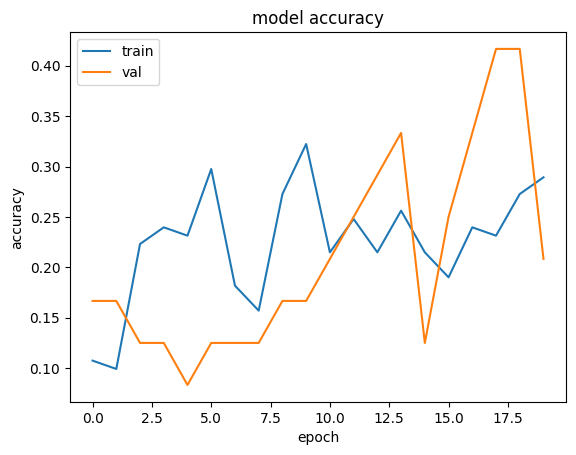

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

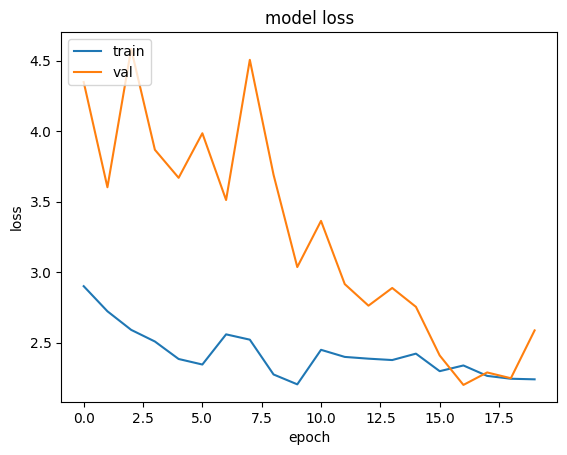

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 59s 372ms/step - loss: 2.6526 - accuracy: 0.1975
Test loss: 2.6526379585266113
Test accuracy: 0.19745223224163055
